In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

train_df = pd.read_csv('mnist_train.csv')

#separate labels and pixel values
y = train_df.iloc[:, 0].values
X = train_df.iloc[:, 1:].values

#normalize pixel values (0-255) to (0-1)
X = X / 255.0

#reshape into 28x28 images with 1 color channel
X = X.reshape(-1, 28, 28, 1)

#one-hot encode the labels
y = to_categorical(y, num_classes=10)

#split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (54000, 28, 28, 1)
Validation data shape: (6000, 28, 28, 1)
Training labels shape: (54000, 10)


In [54]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 明确输入层
inputs = Input(shape=(28, 28, 1))

# 网络结构
x = Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
flatten_output = Flatten()(x)
outputs = Dense(10, activation='softmax')(flatten_output)

# 构建模型
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,098 (35.54 KB)

 Trainable params: 9,098 (35.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# create a callback to save the model after every epoch
feature_extractor = Model(inputs=model.input, outputs=flatten_output)

# substract the feature extractor from the model
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)

# prepare the labels for kNN
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# train kNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train_features, y_train_labels)

# evaluate kNN classifier on test set
y_pred_knn = knn.predict(test_features)
knn_acc = accuracy_score(y_test_labels, y_pred_knn)
print(f"kNN accuracy on CNN-extracted features: {knn_acc:.4f}")


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
kNN accuracy on CNN-extracted features: 0.9691


In [56]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7841 - loss: 0.7513 - val_accuracy: 0.9660 - val_loss: 0.1188
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9651 - loss: 0.1169 - val_accuracy: 0.9728 - val_loss: 0.0860
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9751 - loss: 0.0829 - val_accuracy: 0.9800 - val_loss: 0.0738
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9805 - loss: 0.0633 - val_accuracy: 0.9805 - val_loss: 0.0640
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9827 - loss: 0.0547 - val_accuracy: 0.9823 - val_loss: 0.0615
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9857 - loss: 0.0491 - val_accuracy: 0.9827 - val_loss: 0.0563
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9858 - val_loss: 0.0496
Epoch 8/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9885 - loss: 0.0389 - val_accu

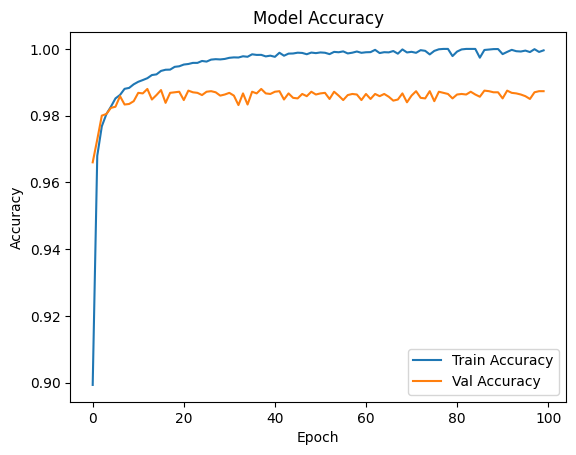

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
test_df = pd.read_csv("mnist_test.csv")

#separate features and labels
y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values

#normalize pixel values
X_test = X_test / 255.0

#reshape to 28x28x1
X_test = X_test.reshape(-1, 28, 28, 1)

#one-hot encode test labels
y_test = to_categorical(y_test, num_classes=10)

print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.1348
Test Accuracy: 0.9873


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


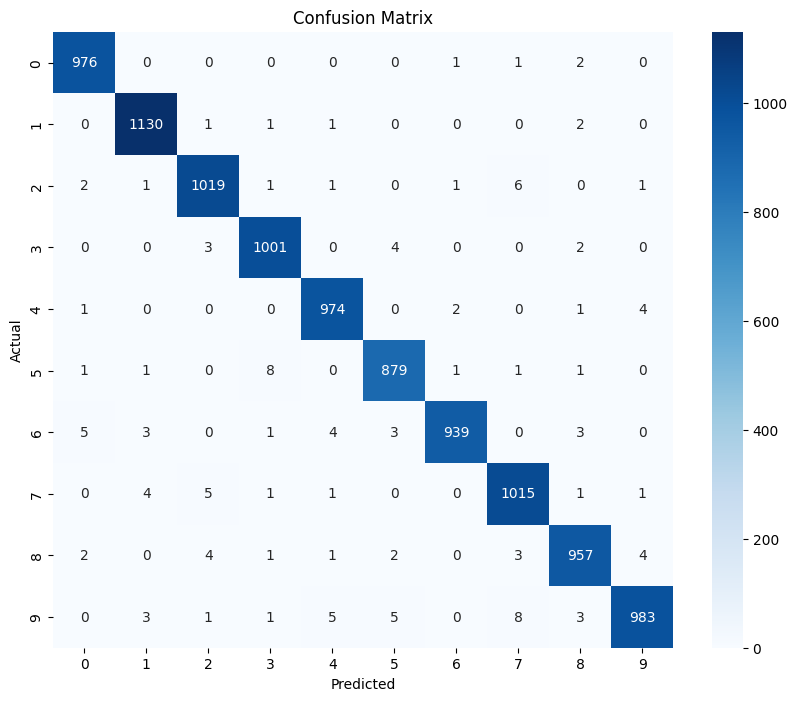

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

#predict class labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)        # decode one-hot labels

cm = confusion_matrix(y_true, y_pred)

#display with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


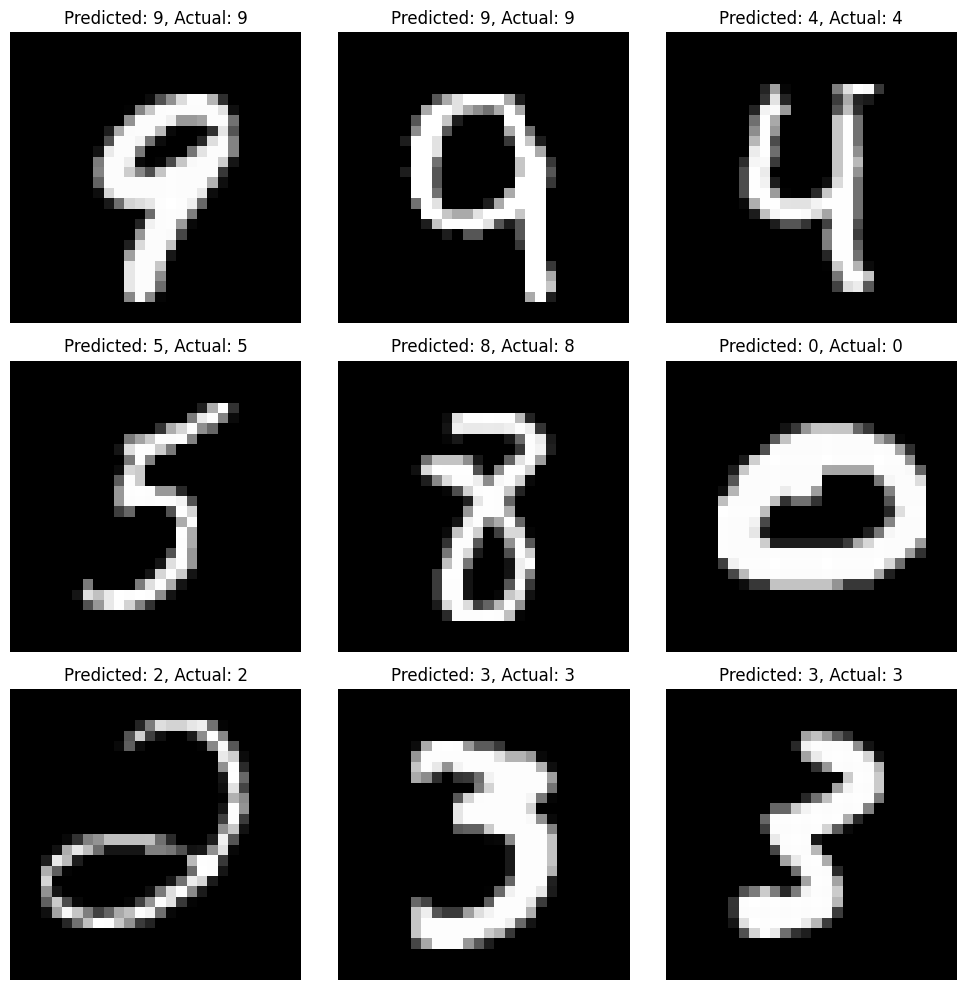

In [62]:
import random

#pick 9 random indices
indices = random.sample(range(len(X_test)), 9)
sample_images = X_test[indices]
sample_labels = np.argmax(y_test[indices], axis=1)
sample_preds = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {sample_preds[i]}, Actual: {sample_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

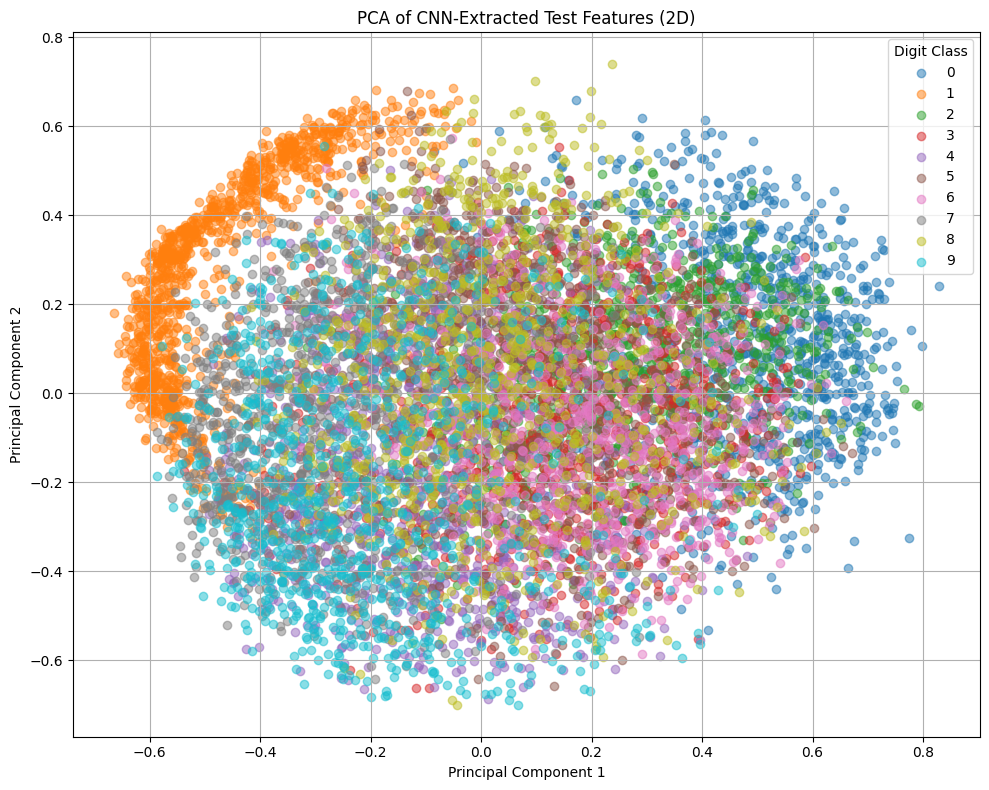

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: PCA-REDUCE 2D
# substract the features from the test set using the feature extractor
pca = PCA(n_components=2)
test_pca = pca.fit_transform(test_features)

# Step 2: prepare labels
labels = y_test_labels  # use the original labels from the test set

# Step 3: draw the PCA plot
plt.figure(figsize=(10, 8))
for i in range(10):
    idx = labels == i
    plt.scatter(test_pca[idx, 0], test_pca[idx, 1], label=str(i), alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of CNN-Extracted Test Features (2D)")
plt.legend(title="Digit Class")
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: PCA-REDUCE 10D
# substract the features from the test set using the feature extractor
pca_10 = PCA(n_components=10)
train_pca_10 = pca_10.fit_transform(train_features)
test_pca_10 = pca_10.transform(test_features)

# Step 2: kNN classifier
# train kNN classifier on the PCA-reduced training set
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train_pca_10, y_train_labels)

# Step 3: test the classifier on the PCA-reduced test set
# predict class labels
y_pred_knn_10d = knn.predict(test_pca_10)
knn_accuracy_10d = accuracy_score(y_test_labels, y_pred_knn_10d)

print(f"kNN accuracy on 10D PCA features: {knn_accuracy_10d:.4f}")


kNN accuracy on 10D PCA features: 0.9024
